In [1]:
import pandas as pd

In [2]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [3]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True, nrows=400000)  # İlk 400,000 satırı oku
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True, nrows=400000)  # İlk 400,000 satırı oku

# Verilerin ilk 5 satırını görüntüle
display(df.head())


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [4]:
df=df.sample(400000)

In [6]:
df['helpful_percentage'] = df['helpful'].apply(lambda x: (x[0] / x[1]) * 100 if x[1] != 0 else 0)

In [7]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_percentage
396681,A1ZPUEHF4AES86,B0015YJOK2,Josh B,"[0, 0]",I like this thing. It's unfortunately slowly b...,4,Excellent Product,1364169600,"03 25, 2013",0.0
192322,A2Q2WDSBBW1L83,B000EDO4JG,Brett Conley,"[0, 0]",I decided to ignore other reviewers' comments ...,3,Wow! And that's an overstatement,1196985600,"12 7, 2007",0.0
363014,AHQDLVCXS35CF,B0011YZJPA,Carey J. Boyer,"[0, 2]",Not so good !!!! Will not work with my D5100 l...,1,Not so good !!!!,1377302400,"08 24, 2013",0.0
336530,AQNX0WN00JEVE,B000W4CH8C,C. Thilmany,"[3, 3]",I just needed a replacement for one remote. R...,3,Was expecting better,1297296000,"02 10, 2011",100.0
286876,A39B5NJ5QOUQGU,B000OYR9S8,Erol,"[0, 0]",Arrived nicely packaged and without any damage...,5,Excellent background,1388620800,"01 2, 2014",0.0


In [8]:
df["reviewText"]= df["reviewText"].str.lower() #kucuk harfe donusturduk
df["reviewText"]= df["reviewText"].str.replace('[^\w\s]','')#noktalama işaretlerini kaldır
df["reviewText"]= df["reviewText"].str.replace('\n','') # slash n leri bul kaldır boşlukları bul kaldır
df["reviewText"]= df["reviewText"].str.replace('\d+','') #rakamları bul kaldır
df["reviewText"]= df["reviewText"].str.replace('\r','') #satırbaslarını kaldır

In [9]:
x=df["reviewText"]
y=df["overall"]

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr= PorterStemmer()

In [13]:
def lemmafn(text):
    words=TextBlob(text).words
    return[pr.stem(word) for word in words]

In [14]:
vect=CountVectorizer(stop_words="english", ngram_range=(1,2), analyzer=lemmafn)
#ngram birönceki 2 kelimeye bakar

In [16]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
x=vect.fit_transform(x)

In [18]:
 x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=42, test_size=0.20)

In [19]:
nb=MultinomialNB()

In [20]:
model=nb.fit(x_train,y_train)

In [21]:
tahmin=model.predict(x_test)

In [22]:
accuracy_score(tahmin,y_test)

0.6286125

In [23]:
from sklearn.naive_bayes import BernoulliNB

In [24]:
b=BernoulliNB()

In [25]:
model=b.fit(x_train, y_train)

In [26]:
tahmin=model.predict(x_test)

In [27]:
accuracy_score(tahmin, y_test)

0.554475

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
d=DecisionTreeClassifier()

In [30]:
model=d.fit(x_train, y_train)

In [31]:
tahmin=model.predict(x_test)

In [32]:
accuracy_score(tahmin, y_test)

0.5336

In [33]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [34]:
k.fit(x,y)

KNeighborsClassifier()

In [35]:
tahmin3=k.predict(x)

KeyboardInterrupt: ignored

In [ ]:
accuracy_score(tahmin3,y)

In [36]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [37]:
l.fit(x,y)

KeyboardInterrupt: ignored

In [ ]:
tahmin4=l.predict(x)

In [ ]:
accuracy_score(tahmin4,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [ ]:
r.fit(x,y)

In [ ]:
tahmin6=r.predict(x)

In [ ]:
accuracy_score(tahmin6,y)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [39]:
gb.fit(x,y)

GradientBoostingClassifier()

In [40]:
tahmin7=gb.predict(x)

In [41]:
accuracy_score(tahmin7,y)

0.6378825

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS  #gereksiz kelimeleri kaldır
from PIL import Image #resim okutmak için
import numpy as np

In [12]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(" ".join(data)) # join diyerek bütün sütunlardaki satırları birleştiriyor
    plt.imshow(wc)
    plt.axis("off")

In [13]:
" ".join(df["reviewText"]) #butun satırları bırlestırdı tek bır text yaptı

In [14]:
import matplotlib.pyplot as plt

In [15]:
text=df[df["overall"]==1]["reviewText"]

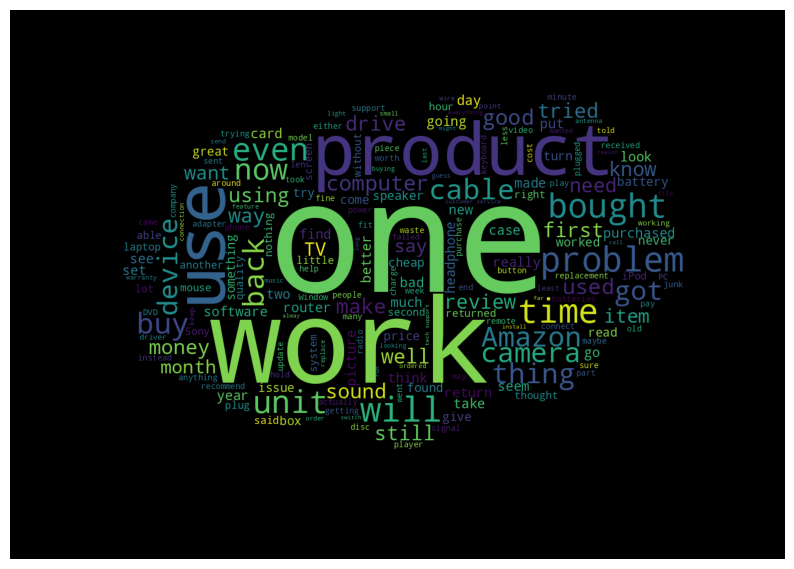

In [17]:
wc(text,"black")